In [107]:
import pandas as pd
import geopandas as gpd

In [39]:
sd_map = gpd.read_file('./data/address/ADDRESS_APN.shp')
locations_df = pd.read_csv('./data/meters/meter_locations.csv')
transactions_df = pd.read_csv('./data/meters/meter_transactions.csv')
zip_codes = gpd.read_file('./data/zip_codes/geo_export_90b871f7-fa23-4761-9917-7fb7d3fa973a.shp')

#### Data Sources
Parking Meter Locations: https://data.sandiego.gov/datasets/parking-meters-locations/  
Parking Meter Transactions: https://data.sandiego.gov/datasets/parking-meters-transactions/  
San Diego Map: https://rdw.sandag.org/Account/gisdtview?dir=Address  
Zip Code: https://data.sandiegocounty.gov/Maps-and-Geographical-Resources/Zip-Codes/vsuf-uefy

## Check the CRS of zip_codes

In [137]:
zip_codes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Convert DataFrame to GeoDataFrame

In [136]:
locations = gpd.GeoDataFrame(locations_df, geometry = gpd.points_from_xy(locations_df.lng, locations_df.lat))
locations.crs = 'epsg:4326'

## Plot All Meters

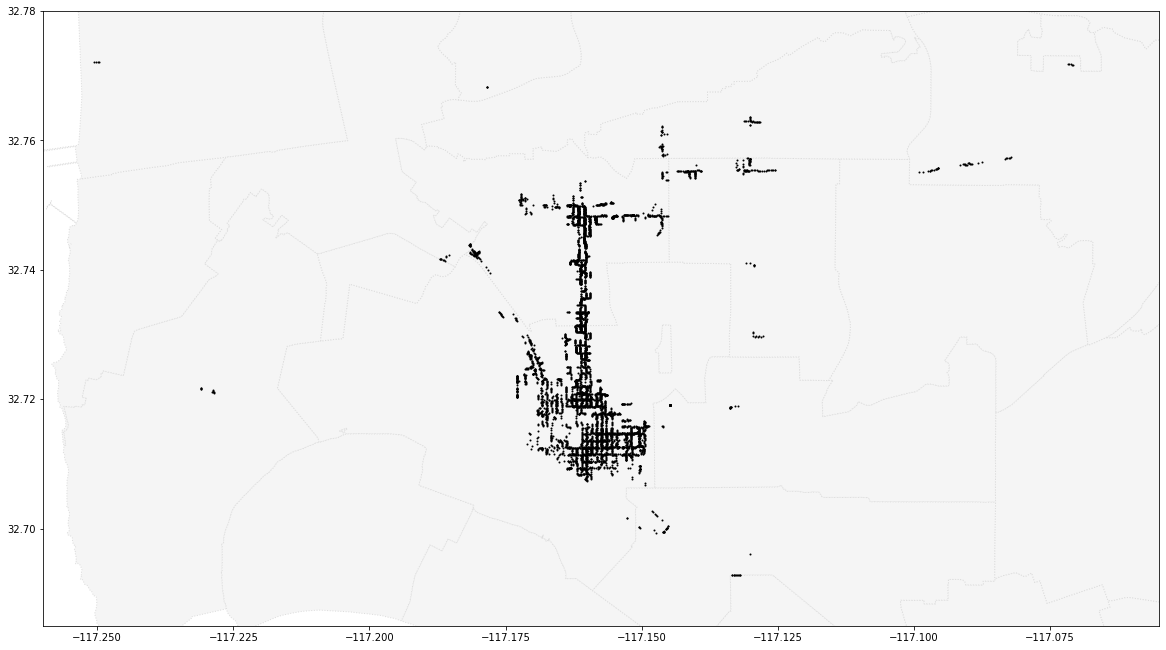

In [138]:
# Use zip_codes as the background map
ax = zip_codes.plot(figsize=(20,12), color='whitesmoke', edgecolor='gainsboro', linestyle = ':')

# zip_codes illustrates the map of the entire San Diego county.
# Set boundaries so that the city of San Diego is in focus.
ax.set_xlim(-117.26, -117.055)
ax.set_ylim(32.685, 32.78)

# It looks like there are some wrong data points in the locations geodataframe. 
# San Diego has the longitude and latitude of 32.7157° N, 117.1611° W
# Get rid of all rows with a Point object that is extremely away from the coordinate of the city

locations = locations[locations['geometry'].x < -100] 
locations = locations [locations['geometry'].x > -120]
locations = locations [locations['geometry'].y > 32.6]
locations = locations [locations['geometry'].y < 32.8]

# Plot the meteres on map
locations.plot(color = 'black', markersize = 1, ax = ax)

In [21]:
transactions.head()

,pole_id,meter_type,date_trans_start,date_meter_expire,trans_amt,pay_method
0,IV-424,SS,2020-02-24 11:39:31,2020-02-24 13:39:31,250,CREDIT CARD
1,IV-424,SS,2020-02-24 13:24:46,2020-02-24 15:24:46,225,CREDIT CARD
2,IV-424,SS,2020-02-24 15:25:52,2020-02-24 17:25:52,250,CREDIT CARD
3,NU-100,SS,2020-03-14 17:08:35,2020-03-14 17:56:35,100,CASH
4,NU-100,SS,2020-03-14 17:09:24,2020-03-14 18:00:00,25,CASH


In [65]:
zip_codes.head()

,community,shape_star,shape_stle,zip,geometry
0,Alpine,4.149940e+09,326045.262676,91901.0,"POLYGON ((-116.74539 32.96063, -116.74085 32.9..."
1,Bonita,2.739094e+08,113257.374615,91902.0,"POLYGON ((-116.97172 32.70838, -116.97124 32.7..."
2,Boulevard,2.735681e+09,241725.552214,91905.0,"POLYGON ((-116.23165 32.75083, -116.22809 32.7..."
3,Campo,3.066759e+09,287410.325075,91906.0,"POLYGON ((-116.35677 32.70460, -116.35729 32.7..."
4,Chula Vista,4.034374e+08,112587.791814,91910.0,"POLYGON ((-117.06354 32.65011, -117.06345 32.6..."
